In [1]:
# Tensorflow Introduction
# Base code

import tensorflow as tf
from tensorflow import keras
# Keras: 텐서플로우 모델을 만들고 훈련할 수 있는 고수준 API

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc1


In [3]:
import os

In [6]:
base_dir = 'C:\\Users\\82108\\Documents\\GitHub\\DataScienceStudy_NationalFlagRecog\\Flag_Data'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

batch_size = 128

# train dataset 불러오기
trainGen = imageGenerator.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    subset='training',
    class_mode='categorical'
)

# val dataset 불러오기
validationGen = imageGenerator.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    subset='validation',
    class_mode='categorical'
)

Found 1830 images belonging to 7 classes.
Found 38 images belonging to 7 classes.


In [66]:
#옮겨 담기
sample_training_images, _ = next(trainGen)

# 이미지를 보여주는 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
# plotImages(sample_training_images[:5])

In [71]:
from tensorflow.keras.layers import InputLayer ,Dense, Conv2D, Flatten, Dropout, MaxPooling2D

# model = keras.Sequential([
#     Flatten(input_shape=(64, 64)),
#     Dense(128, activation='relu'),
#     Dense(7, activation='softmax')
# ])

model = keras.Sequential([ 
    InputLayer(input_shape=(64,64,3)),
    Conv2D(16, (3,3), (1,1), padding ='same', activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), (1,1), padding ='same', activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), (1,1), padding ='same', activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
    ])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 4096)            

In [128]:
trainGen.labels[0]

0

In [73]:
epochs = 5

history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
366/366 [==============================] - 103s 282ms/step - loss: 0.9819 - accuracy: 0.6513 - val_loss: 0.5148 - val_accuracy: 0.8891
Epoch 2/5
366/366 [==============================] - 101s 275ms/step - loss: 0.3937 - accuracy: 0.8780 - val_loss: 0.2525 - val_accuracy: 0.9244
Epoch 3/5
366/366 [==============================] - 108s 296ms/step - loss: 0.2682 - accuracy: 0.9143 - val_loss: 0.2682 - val_accuracy: 0.9252
Epoch 4/5
366/366 [==============================] - 107s 293ms/step - loss: 0.2101 - accuracy: 0.9324 - val_loss: 0.2183 - val_accuracy: 0.9586
Epoch 5/5
366/366 [==============================] - 103s 280ms/step - loss: 0.1741 - accuracy: 0.9466 - val_loss: 0.2956 - val_accuracy: 0.9369


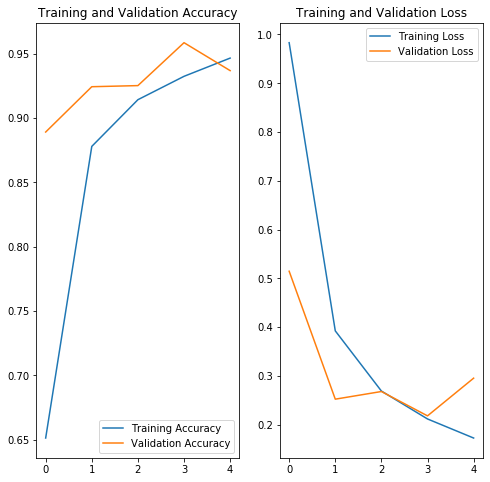

In [83]:
epochs_range = range(epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [86]:
test_dir = os.path.join(base_dir,'test')

testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    test_dir,
    target_size=(64, 64),
)

# loss and accuracy
model.evaluate_generator(testGen)

Found 199 images belonging to 7 classes.


[0.4087250456213951, 0.8844221]

In [176]:
predictions = model.predict(testGen[0])

In [177]:
predictions[0]

array([8.0224080e-04, 6.9100879e-06, 1.3964102e-03, 3.2774292e-04,
       9.9746180e-01, 4.2685951e-07, 4.4433782e-06], dtype=float32)

In [89]:
np.argmax(predictions[0])

4

In [156]:
from tensorflow.keras.preprocessing.image import array_to_img

country_index = ['can', 'eng','fra','ger','ita','kor','usa']

예측: fra
정답: fra


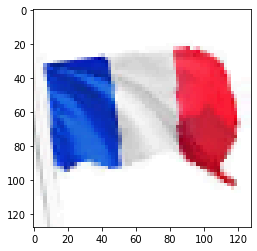

In [175]:
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(country_index[result[0]]))
print('정답: {}'.format(country_index[np.argmax(imgs[1][0])]))


In [ ]:
# Visualization - not complete
def plot_image(i, prediction, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    if prediction == true_label:
    color = 'blue'
    else:
    color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    imgs = testGen.next()
    arr = imgs[0][0]
    img = array_to_img(arr).resize((128, 128))
    prediction = model.predict_classes(arr.reshape(1, 64, 64, 3))
    
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, country_index[result[0]],country_index[np.argmax(imgs[1][0])] , img)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_arrayplot_image(i, country_index[result[0]],country_index[np.argmax(imgs[1][0])] , img)
plt.show()